In [ ]:
# Code Reference
# https://www.kaggle.com/paultimothymooney/interpret-sign-language-with-deep-learning/notebook
# https://www.kaggle.com/ahmedkhanak1995/cnn-on-sign-language-gesture-images-dataset/data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

In [2]:
# path="asl/asl"
# file_list = os.listdir(path)
# for i in file_list:
#     num=os.listdir(path+"/"+ i)
#     print(i + " data number:"+str(len(num)))

In [3]:
# source_path = "asl/asl"
# test_data_path = "asl/test_asl/"
# files_dir = os.listdir(source_path)
# import shutil
# import numpy as np
# for f_dir in files_dir:
#     files=os.listdir(source_path + "/" + f_dir)
#     for f in files:
#         if np.random.rand(1) < 0.2:  # 8:2 
#             path = test_data_path + '/'+ f_dir
#             if not os.path.exists(path):
#                 os.makedirs(path)
#             shutil.move(source_path + '/'+ f_dir + "/" + f, path)

In [4]:

# source_path = "GestureImageData"
# test_data_path = "GestureImageData/test_gid"
# files_dir = os.listdir(source_path)
# import shutil
# import numpy as np
# for f_dir in files_dir:
#     files=os.listdir(source_path + "/" + f_dir)
#     for f in files:
#         if np.random.rand(1) < 0.2:  # 8:2 
#             path = test_data_path + '/'+ f_dir
#             if not os.path.exists(path):
#                 os.makedirs(path)
#             shutil.move(source_path + '/'+ f_dir + "/" + f, path)

In [5]:
dict_labels = {
    '0':1, '1':2, '2':3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10,
    'a':11, 'b':12, 'c':13, 'd':14, 'e':15, 'f':16, 'g':17, 'h':18, 'i':19,
    'j':20, 'k':21, 'l':22, 'm':23, 'n':24, 'o':25, 'p':26, 'q':27, 'r':28,
    's':29, 't':30, 'u':31, 'v':32, 'w':33, 'x':34, 'y':35, 'z':36, 
}

In [6]:
path = 'asl/asl'
gestures = os.listdir(path)[1:]

x = []
y = []

for ix in gestures:
    images = os.listdir(path +'/'+ix)
    print(ix)
    for cx in images:
        img_path = path+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
#         img = img.reshape((50,50,3))
        x.append(img)
        y.append(dict_labels[ix])
        x.append(cv2.flip(img, 0));
        y.append(dict_labels[ix])

r
u
9
0
7
i
n
g
6
z
1
8
t
s
a
f
o
h
m
j
c
d
v
q
4
x
3
e
b
k
l
2
y
5
p
w


In [7]:
dict_labels_new = {
    '0':1, '1':2, '2':3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10,
    'A':11, 'B':12, 'C':13, 'D':14, 'E':15, 'F':16, 'G':17, 'H':18, 'I':19,
    'J':20, 'K':21, 'L':22, 'M':23, 'N':24, 'O':25, 'P':26, 'Q':27, 'R':28,
    'S':29, 'T':30, 'U':31, 'V':32, 'W':33, 'X':34, 'Y':35, 'Z':36, 
}

In [8]:
path = 'GestureImageData'
gestures = os.listdir(path)[1:]

for ix in gestures:
    images = os.listdir(path +'/'+ix)
    print(ix)
    for cx in images:
        img_path = path+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
#         img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
#         img = img.reshape((50,50,3))
        if(img is None):
            continue
        x.append(img)
        y.append(dict_labels_new[ix])
        x.append(cv2.flip(img, 0));
        y.append(dict_labels_new[ix])

R
U
9
0
7
I
N
G
6
Z
1
8
T
S
A
F
O
H
M
J
C
D
V
Q
4
X
3
E
B
K
L
2
Y
5
P
W


In [9]:
Y = to_categorical(np.array(y))
X = np.array(x)/255.0

In [10]:
X.shape

(126922, 50, 50, 3)

In [11]:
x_test = []
y_test = []

path_test = 'asl/test_asl/'
gestures_test = os.listdir(path_test)[1:]

for ix in gestures_test:
    images = os.listdir(path_test +ix)
    print(ix)
    for cx in images:
        img_path = path_test+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
#         img = img.reshape((100,100,3))
        x_test.append(img)
        y_test.append(dict_labels[ix])
        x_test.append(cv2.flip(img, 0))
        y_test.append(dict_labels[ix])

r
u
9
0
7
i
n
g
6
z
1
8
t
s
a
f
o
h
m
j
c
d
v
q
4
x
3
e
b
k
l
2
y
5
p
w


In [13]:
path_test = 'test_gid'
gestures_test = os.listdir(path_test)[1:]

for ix in gestures_test:
    images = os.listdir(path_test +'/'+ix)
    print(ix)
    for cx in images:
        img_path = path_test+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
#         img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
#         img = img.reshape((100,100,3))

        if(img is None):
            continue
            
        x_test.append(img)
        y_test.append(dict_labels_new[ix])
        x_test.append(cv2.flip(img, 0))
        y_test.append(dict_labels_new[ix])

R
U
9
0
7
I
N
G
6
Z
1
8
T
S
A
F
O
H
M
J
C
D
V
Q
4
X
3
E
B
K
L
2
Y
5
P
W


In [14]:
Y_test = to_categorical(np.array(y_test))
X_test = np.array(x_test)/255.0


In [15]:
Y_test.shape

(31660, 37)

In [16]:
X_test.shape

(31660, 50, 50, 3)

In [17]:
X.shape

(126922, 50, 50, 3)

In [18]:
Y.shape

(126922, 37)

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,shuffle=True)

In [20]:
X_train.shape

(101537, 50, 50, 3)

In [21]:
import keras
from keras.applications.vgg16 import VGG16
from sklearn.utils import class_weight
from keras import models, layers, optimizers
from keras.models import Model
import sklearn

class_weight1 = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_path1 = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model_1 = VGG16(weights = weight_path1, include_top=False, input_shape=(50, 50, 3))

def pretrainedNetwork(xtrain,ytrain,xtest,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,labels):
    base_model = pretrained_model_1 # Topless
    # Add top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False
        
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    
    # Fit model
#     history = model.fit(xtrain,ytrain, epochs=numepochs, class_weight=classweight, validation_data=(xtest,ytest), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    history = model.fit(xtrain,ytrain, epochs=numepochs, batch_size=64,validation_data=(xtest,ytest))

    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
#     y_pred = model.predict(xtest)
#     print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values()))) 
#     Y_pred_classes = np.argmax(y_pred,axis = 1) 
#     Y_true = np.argmax(ytest,axis = 1) 


#     confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
#     plotKerasLearningCurve()
#     plt.show()
#     plot_learning_curve(history)
#     plt.show()
#     plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
#     plt.show()
    return model,history
themodel = pretrainedNetwork(X_train, Y_train, X_val, Y_val, pretrained_model_1,weight_path1,class_weight1,37,50,dict_labels)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [22]:
y_pred = themodel.predict(X_test)
print(sklearn.metrics.classification_report(np.where(Y_test > 0)[1], np.argmax(y_pred, axis=1))) 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1)

              precision    recall  f1-score   support

           1       0.96      0.93      0.95       876
           2       0.96      0.97      0.96       842
           3       0.90      0.95      0.92       904
           4       1.00      1.00      1.00       786
           5       0.97      0.97      0.97       898
           6       0.98      0.96      0.97       852
           7       0.93      0.91      0.92       908
           8       0.96      0.97      0.96       842
           9       0.98      0.95      0.96       874
          10       0.98      1.00      0.99       848
          11       0.97      0.97      0.97       878
          12       0.99      1.00      0.99       938
          13       0.99      1.00      1.00       874
          14       0.98      0.97      0.98       882
          15       1.00      1.00      1.00       826
          16       0.99      1.00      0.99       826
          17       0.99      0.99      0.99       906
          18       1.00    

In [48]:
# history.history.keys()
themodel[1].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

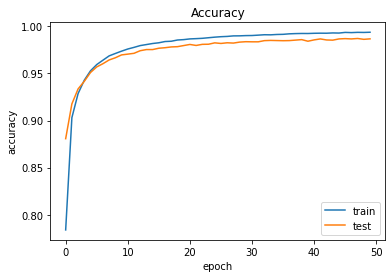

In [28]:
import matplotlib.pyplot as plt

plt.plot(themodel[1].history['accuracy'])
plt.plot(themodel[1].history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

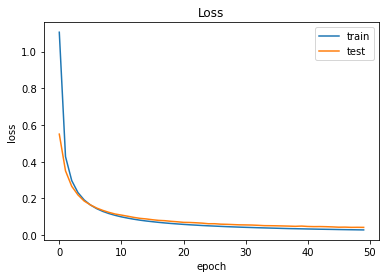

In [29]:
plt.plot(themodel[1].history['loss'])
plt.plot(themodel[1].history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [30]:
themodel[0].save("vgg2dataswithflip")

import pickle

f = open('vgg2dataswithflipHis','wb')
pickle.dump(themodel[1].history,f)
f.close()

INFO:tensorflow:Assets written to: vgg2dataswithflip/assets
